In [2]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [3]:
df = pd.read_csv("result_FreeRTOS.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,ribarry@amazon.com,aggarg@amazon.com,10982575+yuhui-zheng@users.noreply.github.com,33462878+aggarg@users.noreply.github.com,noreply@github.com,60444055+AniruddhaKanhere@users.noreply.github.com,markus.ka.rinne@gmail.com,10982575+yuhui-zheng@users.noreply.github.com.1,hein_tibosch@yahoo.es,...,113639451+rawalexe@users.noreply.github.com,118818625+kar-rahul-aws@users.noreply.github.com.1,sihunzhilei@126.com,tony2037@users.noreply.github.com,Forty-Bot@users.noreply.github.com,154472309+dougwfoster@users.noreply.github.com,32201227+glemco@users.noreply.github.com,78684666+watsk@users.noreply.github.com,33909469+xuelix@users.noreply.github.com,florian.laroche@gmail.com
0,FreeRTOS/Demo,89.652568,0.0,0.0,0.339879,6.155589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FreeRTOS/Demo/ARM7_AT91FR40008_GCC,100.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/ParTest,100.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/ParTest/Par...,100.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/main.c,100.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,FreeRTOS-Plus/Source/Application-Protocols/net...,0.000000,0.0,0.0,0.000000,100.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1803,FreeRTOS-Plus/VisualStudio_StaticProjects,0.000000,0.0,0.0,0.000000,60.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1804,FreeRTOS-Plus/VisualStudio_StaticProjects/Free...,0.000000,0.0,0.0,0.000000,100.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1805,FreeRTOS-Plus/VisualStudio_StaticProjects/Free...,0.000000,0.0,0.0,0.000000,100.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['ribarry@amazon.com', 'aggarg@amazon.com', '10982575+yuhui-zheng@users.noreply.github.com', '33462878+aggarg@users.noreply.github.com', 'noreply@github.com', '60444055+AniruddhaKanhere@users.noreply.github.com', 'markus.ka.rinne@gmail.com', '10982575+yuhui-zheng@users.noreply.github.com.1', 'hein_tibosch@yahoo.es', 'alfred2g@hotmail.com', '60444055+AniruddhaKanhere@users.noreply.github.com.1', '3073890+RichardBarry@users.noreply.github.com', '8697966+wholl0p@users.noreply.github.com', '52972368+nchong-at-aws@users.noreply.github.com', '53273776+lundinc2@users.noreply.github.com', '45935231+m17336@users.noreply.github.com', '62984531+TakayukiMatsuo@users.noreply.github.com', 'mingyue86010@gmail.com', '35851496+cobusve@users.noreply.github.com', '14828980+gkwicker@users.noreply.github.com', '59750547+dachalco@users.noreply.github.com', 'NoMaY-jp@outlook.com', 'bhagavar@amazon.com', 'andyjpb@ashurst.eu.org', 'stbnrivas@gmail.com', 'tuttle@acm.org', 'architag@amazon.com', 'abrinao@amazon.

In [15]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 27


In [14]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 77


In [6]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_FreeRTOS.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_FreeRTOS.csv


In [7]:
data = pd.read_csv("contagem_arquivos_por_responsavel_FreeRTOS.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,ribarry@amazon.com,1215
1,aggarg@amazon.com,4
2,10982575+yuhui-zheng@users.noreply.github.com,5
3,33462878+aggarg@users.noreply.github.com,7
4,noreply@github.com,706
...,...,...
72,154472309+dougwfoster@users.noreply.github.com,0
73,32201227+glemco@users.noreply.github.com,0
74,78684666+watsk@users.noreply.github.com,0
75,33909469+xuelix@users.noreply.github.com,0


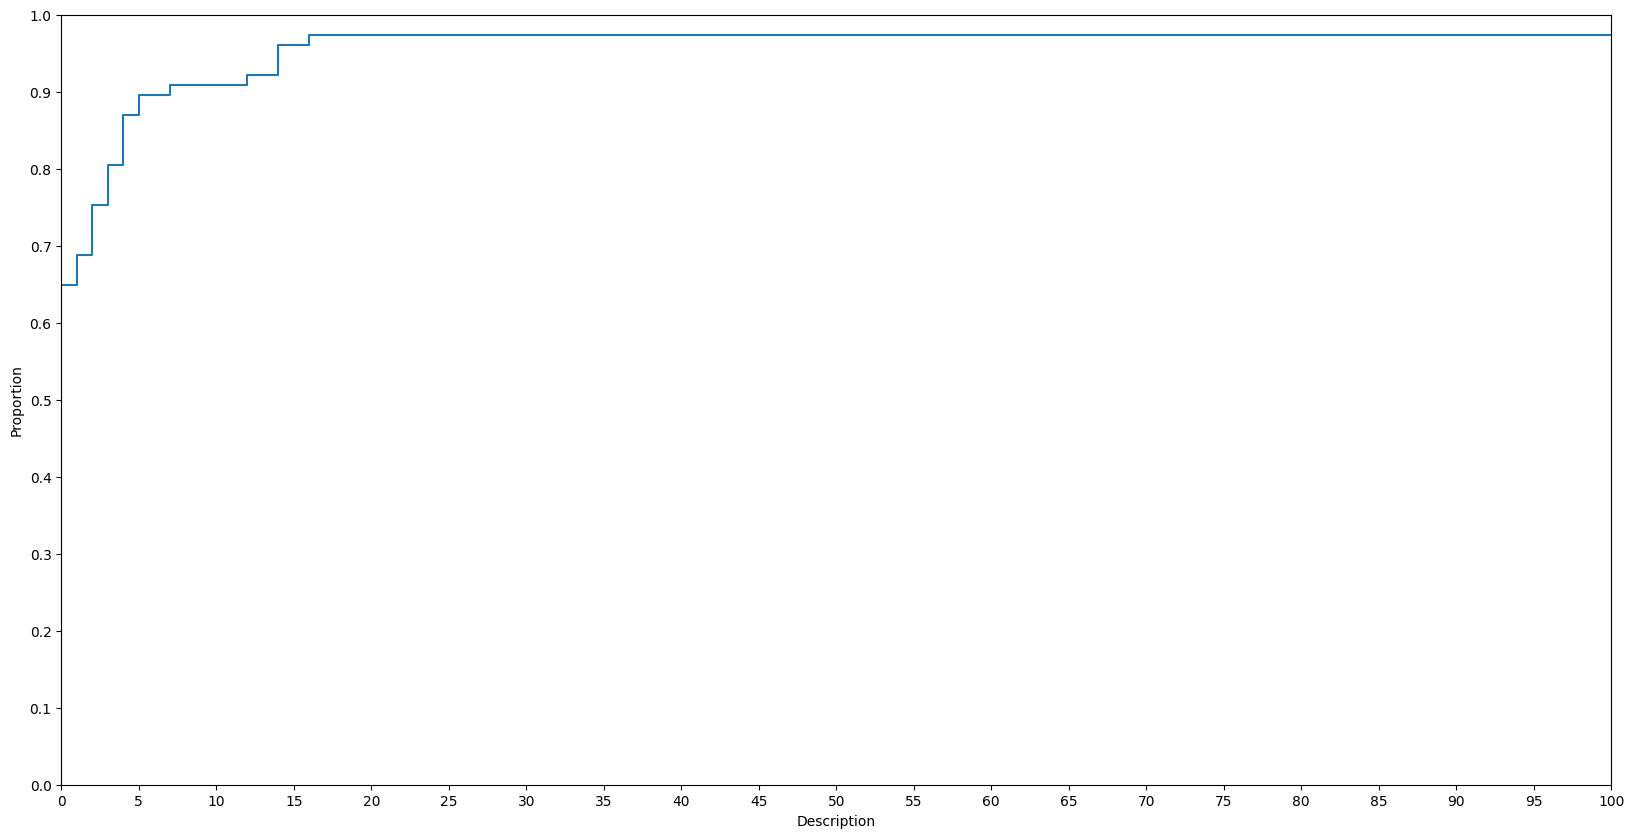

In [8]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

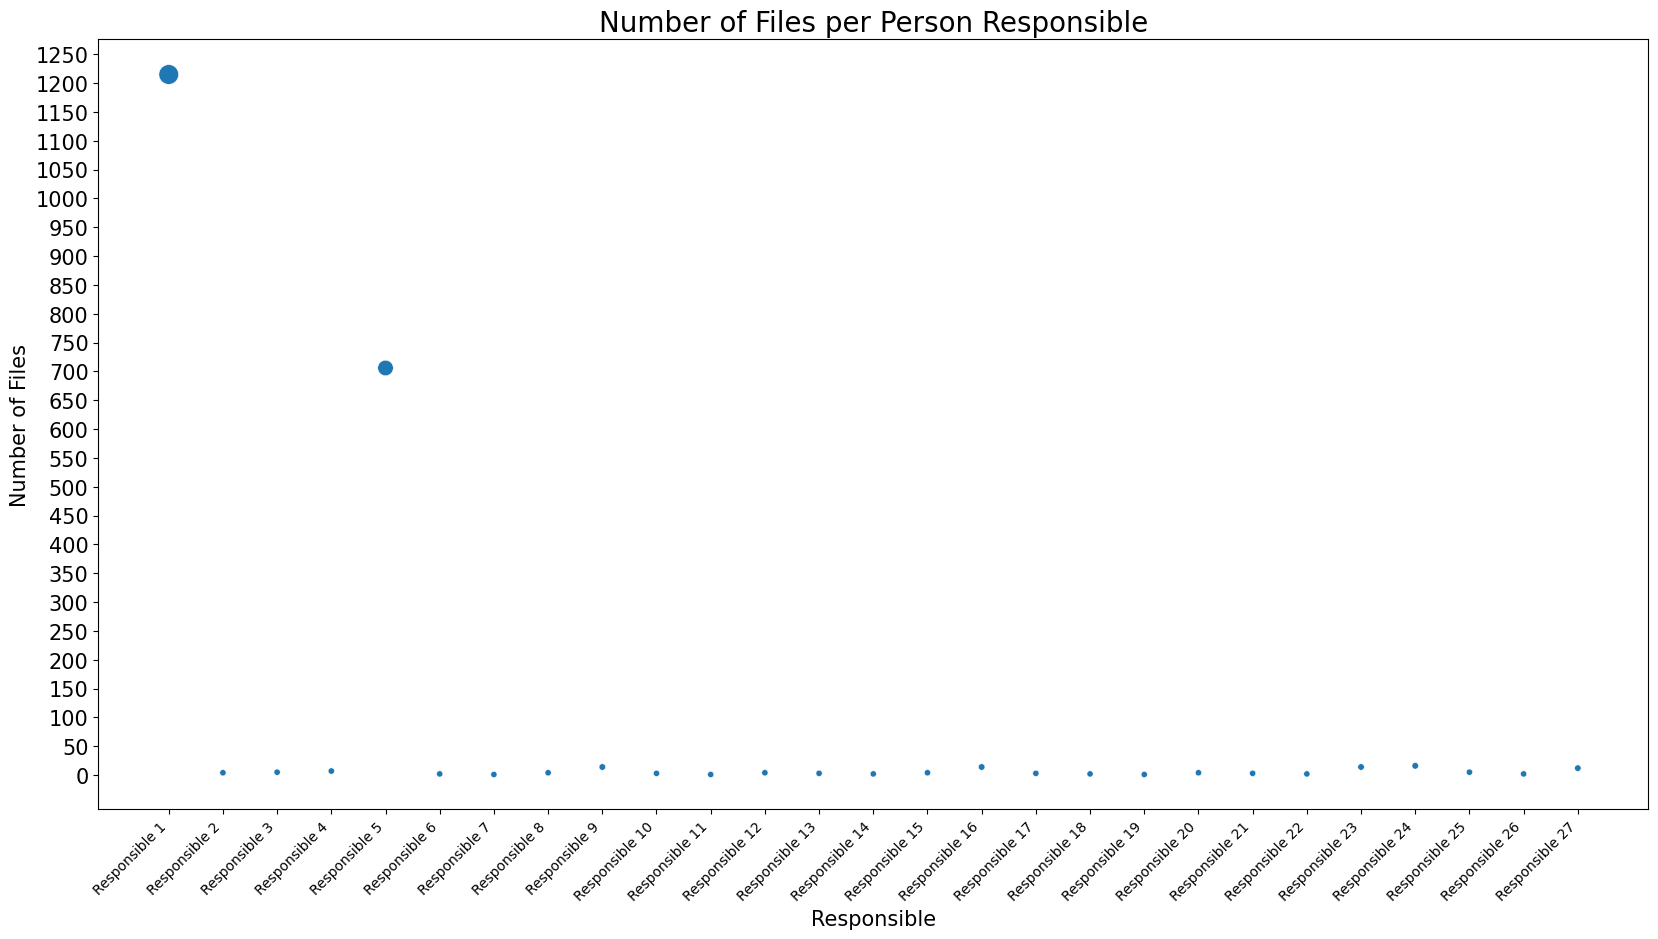

In [9]:

# Filtrar os dados para mostrar apenas aqueles com mais de 20 arquivos, excluindo os responsáveis com 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Criar o gráfico de bolhas
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_data, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.xlabel('Responsible', fontsize=15)  # Ajustar o rótulo do eixo x
plt.ylabel('Number of Files', fontsize=15)  # Ajustar o rótulo do eixo y
plt.title('Number of Files per Person Responsible', fontsize=20)  # Título do gráfico

plt.yticks(np.arange(0, 1251, 50), fontsize=15)  # Ajustar os ticks do eixo y

# Exibir o gráfico
plt.show()

In [10]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_FreeRTOS.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_FreeRTOS.csv


In [11]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_FreeRTOS.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,FreeRTOS/Demo,3
1,FreeRTOS/Demo/ARM7_AT91FR40008_GCC,1
2,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/ParTest,1
3,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/ParTest/Par...,1
4,FreeRTOS/Demo/ARM7_AT91FR40008_GCC/main.c,1
...,...,...
1755,FreeRTOS-Plus/VisualStudio_StaticProjects,2
1756,FreeRTOS-Plus/VisualStudio_StaticProjects/Free...,1
1757,FreeRTOS-Plus/VisualStudio_StaticProjects/Free...,1
1758,FreeRTOS-Plus/VisualStudio_StaticProjects/Free...,1


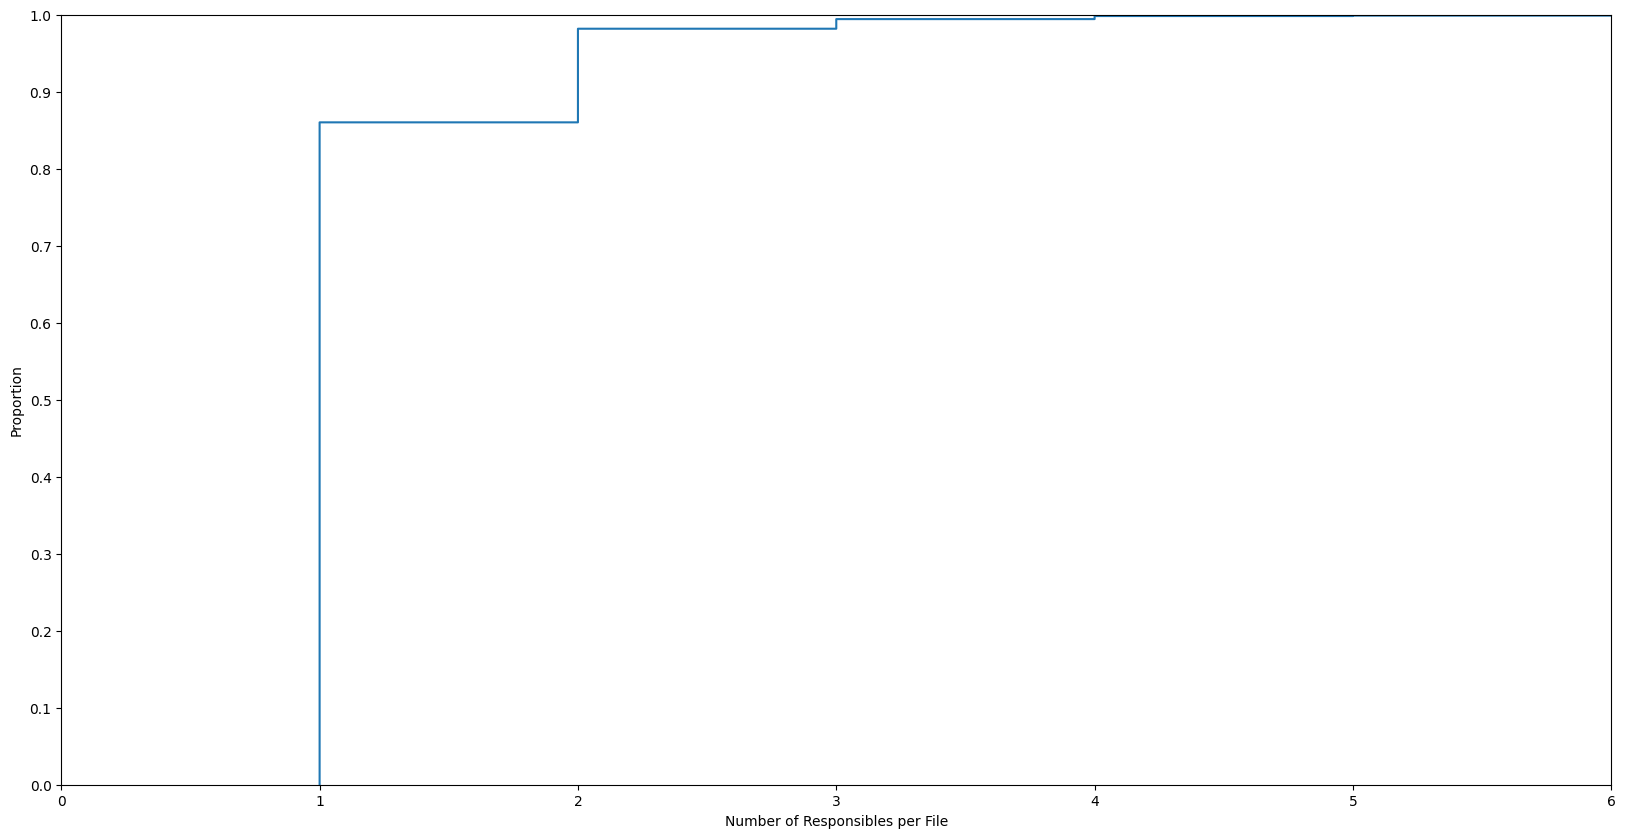

In [12]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()